<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/%EC%8B%AC%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝

선형회귀

로지스틱 회귀

의사결정 나무

k-평균 클러스터링

선형회귀  y = wx +b
```
입력특성과 출력간의 관계를 모델링
iris 데이터로 평가
```


로지스틱 회귀
```
선형결합을 시그모이드 함수로 변환해서 확률값으로 계산 - > 분류
다중클래스면 softmax
iris를 이용
```

의사결정 나무(결정트리)
```
지니계수를 이용해서 단계별로 분리해 나가는 모델이고 앙상블의 기본 모델
iris 이용
```

k-평균 클러스터링
```
비지도학습 데이터를 군집화(레이블 없이 패턴 찾기)
중심점을 이동하면 서 군집을 찾는 알고리즘
iris 이용
```

# iris를 이용해서 각각의 모델을 만들고 평가

라이브러리 로드

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [ ]:
# 랜덤시드 고정
np.random.seed(42)

데이터 로드 및 분할

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

데이터 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # fit_transform 하지 않습니다.. 학습데이터의 특성으로 평가하기위해서

지도 학습 모델 생성 및 학습

In [ ]:
ML_Models = {
'kn' : KNeighborsClassifier(),
'lr_clf' : LogisticRegression(),
'dt' : DecisionTreeClassifier(),
}
for _,model in ML_Models.items():
    model.fit(X_train_scaled, y_train)

In [ ]:
ML_Models['kn'].predict_proba(X_test_scaled)[:3]

array([[0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

In [ ]:
ML_Models['lr_clf'].predict_proba(X_test_scaled)[:3]

array([[1.14571961e-02, 8.75978526e-01, 1.12564278e-01],
       [9.64411302e-01, 3.55882864e-02, 4.11287569e-07],
       [3.77322994e-08, 2.88231142e-03, 9.97117651e-01]])

In [ ]:
ML_Models['dt'].predict_proba(X_test_scaled)[:3]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
# 중요 피처를 내림차순으로 인덱스를 정렬
np.argsort(ML_Models['dt'].feature_importances_)[::-1]

array([2, 3, 0, 1])

모델 평가

In [ ]:
from sklearn.metrics import classification_report
for name,model in ML_Models.items():
    pred = model.predict(X_test_scaled)
    print(f'{name} : \n{classification_report(y_test, pred)}')

kn : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

lr_clf : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

dt : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

# 전처리
```
기본적인 데이터 분석
  info, describe, hitmap
결측치 처리
  평균,중앙값, 그룹별... , 최반값
  알고리즘을 이용해서 : 보간기법
이상치 처리
  boxplot등의 시각화를 통해 가늠
  IQR, z-score 등이용
스케일링
  StandardScaler :  Z-score 평균0 표준편차 1 이상치에 약간 민감함
  MinMaxScaler : 0~1 범위로 평균화  이상치에 민감해
  RobustSclaer : 중앙값 IQR 기반 이상치에 강건
  Normalizer : 벡터 정규화(각 셈플 단위로 벡터화)
특성 선택 및 생성
  도메인 기반으로 특성선택
  통계적
  머신러닝 : 트리계열을 사용하면 모델이 best_importance_
  피처엔지니어링을 통해 새로운 특성을 생성
차원 축소  : 이미지나 음성 등 특성이 많은 데이터
  PCA
파이프라인으로 (선택)
  최종 적으로 전처리와 모델이 선택되면 자동화
시각화
  전저리 전후
  박스플롯 스케일일의 결과
  산점도 차원축소 및 특성 선택 결과
```

데이터 가져오기  

In [ ]:
# 분류데이터로 서 iris의 특성을 시각화 및 각종 측정지표를 이용해서 파악
# 클래스 불균형이 없고
# 특정 피처의 분포를 보면.. 클러스터링 되어 있음
# 평균 표준편차, hist 통해 분포모양 확인
# boxplot 을 통해 데이터 분포
from sklearn.datasets import load_iris
import pandas as pd
df = pd.DataFrame(X, columns=load_iris().feature_names)
df['class'] = load_iris().target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


기본통계(기술통계)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


기본 정보

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


결측치 확인

In [ ]:
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
class,0


상관관계 분석

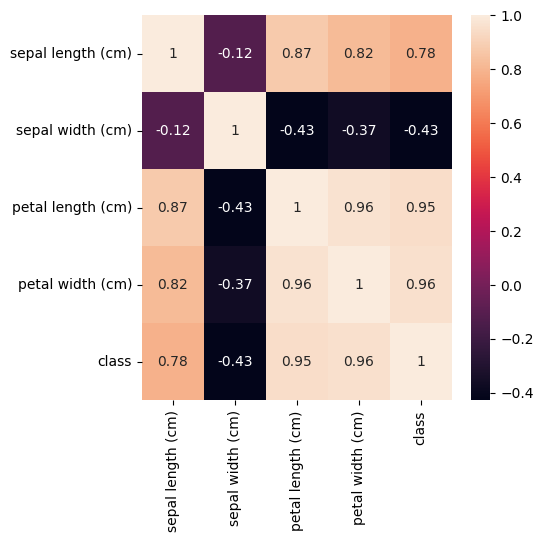

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
# 크기 설정
plt.figure(figsize=(5, 5))
# 히트맵 그리기
sns.heatmap(corr, annot=True)
plt.show()

이상치탐지

In [ ]:
# 이상치 일수록 쉽게 분할된다는 아이디어
# 무작위로 특성을 선택하고 분리해서 고립되는 데이터를 찾는
# 1이면 정상
# -1 이상치
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # 전체데이터의 10%를 이상치로 가정
outlier = iso_forest.fit_predict(df.drop('class', axis=1))
len(np.where(outlier == -1 )[0])
# 이상치 제거
df = df.iloc[np.where(outlier == 1 )[0],:]
df['class'].value_counts()

,count
class,
1,47
2,45
0,43


다양한 스케일링 적용후 데이터 변화 시각화

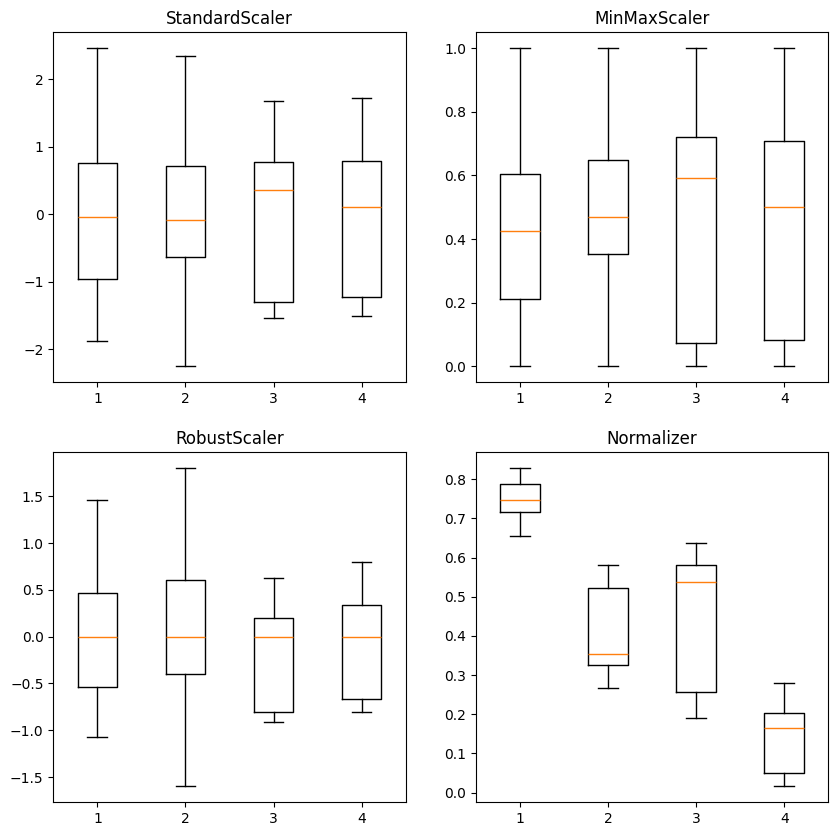

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
scaler_list = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for idx , scaler in enumerate(scaler_list):
    df_scaled = scaler.fit_transform(df.drop('class', axis=1))
    df_scaled = pd.DataFrame(df_scaled, columns=df.drop('class', axis=1).columns)
    i,j = idx//2, idx%2
    axes[i,j].set_title(scaler.__class__.__name__)
    axes[i,j].boxplot(df_scaled)

plt.show()


특성선택
```
SelectKBest : 가장유용한 특성을 선택
  통계적 점수를 기준으로 상위 k 개의 특성을 선택
  차원축소의 기능, 불필요한 특성을 제거

f_classif
  분류문제에서 특성과 타깃의 관계를 평가 ANOVA F 값을 계산
  각 특성에 대한 클래스간의 분산과 클래스내 분산을 비교 통계량
  단점 : 비선형이나 복잡한 상호작용은 반영 못함  

트리모델 사용  
```

<Axes: >

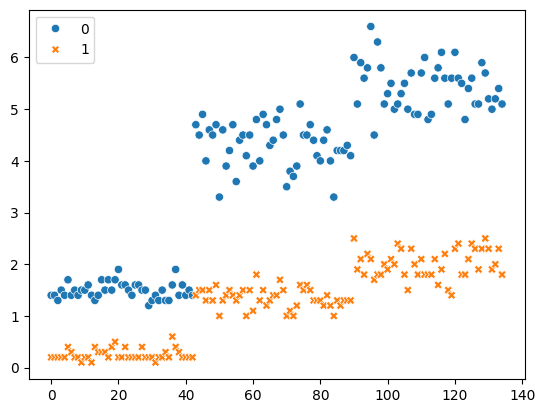

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt
selector = SelectKBest(f_classif, k=2)
X_selected = selector.fit_transform(df.drop('class', axis=1), df['class'])
sns.scatterplot(X_selected)

차원축소

<Axes: >

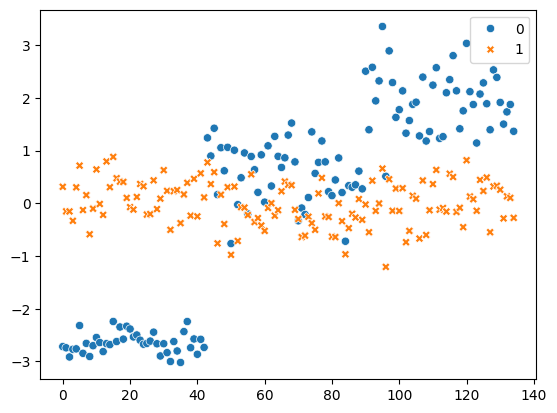

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('class', axis=1))
sns.scatterplot(X_pca)

# 파이프라인 적용
```
각종기법이 정해져 있어야 함
전처리
  스케일링
  이상치
  결측치
  차원축소 또는 중요피처선택
모델
```

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
piplne = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=2)),
    ('model', LogisticRegression())
])
# 파이프라인 학습
piplne.fit(X_train, y_train)
# 평가
piplne.score(X_test, y_test)

1.0

# 앙상블
```
여러모델이 합쳐져서 하나의 모델로 동작
평균
투표
작은모델들이 서로 협력해서 학습 - 스태킹
```

데이터 가져오기 및 분할
```
iris
```

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
# 필요시 pandas 형태로 .... seaborn df를 요구
# 원핫 pd.get_dummy()
df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
df['calss'] = load_iris().target
# X, y 분리
X = df.drop('calss', axis=1)
y = df['calss']
X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

앙상블 모델 적용

In [ ]:
# prompt: RandomForestClassifier, VotingClassifier,GradientBoostingClassifier,StackingClassifier
# 모델을 딕셔너리로 저장하고 각 모델별로 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, StackingClassifier
# 모델 정의
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]
# VotingClassifier
voting_clf = VotingClassifier(estimators=estimators, voting='soft')
# StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# 모델 딕셔너리에 추가
ML_Models = {}
ML_Models['voting'] = voting_clf
ML_Models['stacking'] = stacking_clf
ML_Models['randomforest'] = RandomForestClassifier(random_state=42)
ML_Models['gradientboost'] = GradientBoostingClassifier(random_state=42)

# 모델 학습 및 평가
for name, model in ML_Models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    print(f'{name} : \n{classification_report(y_test, pred)}')


voting : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

stacking : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

randomforest : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00    

# 신경망
```
단일신경망
복합신경망
CNN
RNN
LSTM
GRU
```

단일 신경망

데이터 만들기

(1000, 10) (1000,) [0 1]


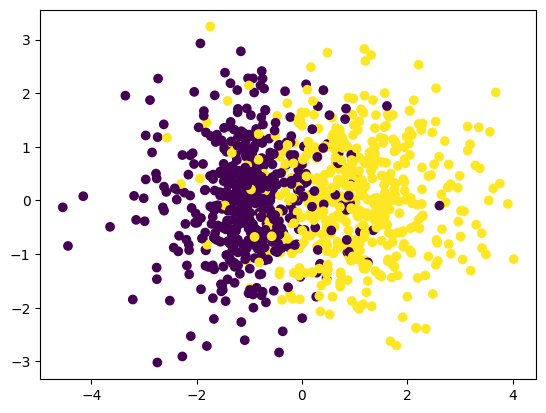

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, class_sep=1.0, flip_y=0.0,  random_state=42)
X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape, y.shape, np.unique(y))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

신경망 모델 적용 및 학습

In [ ]:
import tensorflow as tf
input = tf.keras.layers.Input(shape=(10,))
output = tf.keras.layers.Dense(1, activation='sigmoid')(input)
model = tf.keras.Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test))
model.evaluate(X_test, y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3238 - loss: 1.2653 - val_accuracy: 0.3300 - val_loss: 1.2287
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2899 - loss: 1.2102 - val_accuracy: 0.3350 - val_loss: 1.1883
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3409 - loss: 1.1646 - val_accuracy: 0.3450 - val_loss: 1.1491
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3407 - loss: 1.1404 - val_accuracy: 0.3500 - val_loss: 1.1103
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3159 - loss: 1.1068 - val_accuracy: 0.3600 - val_loss: 1.0732
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3514 - loss: 1.0363 - val_accuracy: 0.3550 - val_loss: 1.0376
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3699 - loss: 0.9964 - val_accuracy: 0.3650 - val_loss: 1.0027
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3497 - loss: 0.9888 - val_accuracy: 0.3750 -

[0.3645128309726715, 0.8700000047683716]

학습결과 시각
```
성능 및 과적합여부 확인
```

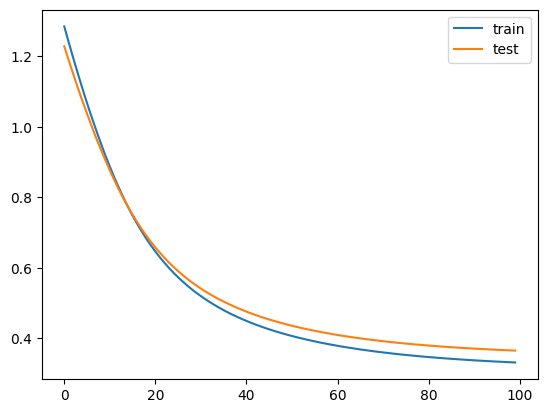

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8692 - loss: 0.3488 
[0.3645128309726715, 0.8700000047683716]


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
print(model.evaluate(X_test, y_test))

라이브러리를사용하지 않고 직접 구현
```
손실함수
값을예측
기울기 업데이트
활성화함수 시그모이드
```

In [ ]:
np.random.rand(10)

array([0.68030754, 0.45049925, 0.01326496, 0.94220176, 0.56328822,
       0.3854165 , 0.01596625, 0.23089383, 0.24102547, 0.68326352])

In [ ]:
import numpy as np
class ANN:
    def __init__(self, input_size, lr = 0.01,epochs=100):
      self.weights = np.random.rand(input_size)  # 평균0 표준편차가1의 정규분포에서 랜덤값을 생성
      self.bias = np.random.rand(1)
      self.input_size = input_size
      self.lr = lr
      self.epochs = epochs
    def sigmoid(self, x):  # 출력을 확률로 해석
      return 1 / (1+np.exp(-x) )
    # 순전파
    def forward(self,x):
      return self.sigmoid(np.dot(x,self.weights) + self.bias )

    def train(self,X,y):
      for epoch in range(self.epochs):
        for i in range(len(X)):  # 확률적 경사하강법 - 훈련데이터를 하나씩 꺼내서 학습
          # 순전파
          output = self.forward(X[i])
          # 오차 계산
          error = y[i] - output
          # error를 곱해서 기울기를 계산
          gradient = error * output * (1 - output)  # output * (1 - output) 시그모이드 함수의 함수미분 - 도함수
          # 가중치 업데이트
          self.weights += self.lr * gradient * X[i]
          self.bias += self.lr * gradient

ann = ANN(input_size=10)
ann.train(X_train, y_train)
ann_predict = ann.forward(X_test)
from sklearn.metrics import accuracy_score
# ann_predict > 0.5  확률로 계산되기 때문에 threshold값을 0.5로 해서 크면 True
accuracy_score(y_test, ann_predict > 0.5)

0.86

복합 신경망
```
데이터는 동일한 데이터
```

다중분류 데이터 만들기

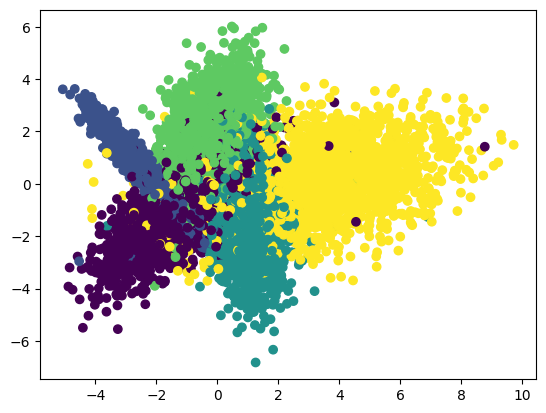

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X, y = make_classification(n_samples=10000, n_features=10, n_clusters_per_class = 1,class_sep=1.0
                           ,n_informative=3, n_classes=5,random_state=42)
# feature를 2개로
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [ ]:
len(np.unique(y))

array([0, 1, 2, 3, 4])

In [ ]:
# 데이터는 분류중에 클래스가 여러개인 데이터를 생성

# tensorflow 이용한 멀티 레이어
X_train.shape[1]
class_num = len(np.unique(y_train))
print(class_num)
input = tf.keras.layers.Input(shape=(X_train.shape[1],))
hidden = tf.keras.layers.Dense(20, activation='relu')(input)
hidden = tf.keras.layers.Dense(10, activation='relu')(hidden)
output = tf.keras.layers.Dense(class_num, activation='softmax')(hidden)
model = tf.keras.Model(inputs=input, outputs=output)
model.summary()
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy , metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test))
model.evaluate(X_test, y_test)

5


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 20)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 325 (1.27 KB)

 Trainable params: 325 (1.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4455 - loss: 1.2879 - val_accuracy: 0.7605 - val_loss: 0.7302
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7575 - loss: 0.6982 - val_accuracy: 0.7645 - val_loss: 0.6316
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7732 - loss: 0.6231 - val_accuracy: 0.7660 - val_loss: 0.6006
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7877 - loss: 0.5954 - val_accuracy: 0.7785 - val_loss: 0.5796
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7934 - loss: 0.5831 - val_accuracy: 0.7920 - val_loss: 0.5652
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8006 - loss: 0.5717 - val_accuracy: 0.7935 - val_loss: 0.5583
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7990 - loss: 0.5658 - val_accuracy: 0.7945 - val_loss: 0.5509
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7967 - loss: 0.5661 - val_accu

# CNN
```
캐글에서 사람 말 데이터
```

In [ ]:
# url = '/content/drive/MyDrive/data/img/horse-or-human.zip'
!unzip /content/drive/MyDrive/data/img/horse-or-human.zip -d img

Archive:  /content/drive/MyDrive/data/img/horse-or-human.zip
  inflating: img/horses/horse01-0.png  
  inflating: img/horses/horse01-1.png  
  inflating: img/horses/horse01-2.png  
  inflating: img/horses/horse01-3.png  
  inflating: img/horses/horse01-4.png  
  inflating: img/horses/horse01-5.png  
  inflating: img/horses/horse01-6.png  
  inflating: img/horses/horse01-7.png  
  inflating: img/horses/horse01-8.png  
  inflating: img/horses/horse01-9.png  
  inflating: img/horses/horse02-0.png  
  inflating: img/horses/horse02-1.png  
  inflating: img/horses/horse02-2.png  
  inflating: img/horses/horse02-3.png  
  inflating: img/horses/horse02-4.png  
  inflating: img/horses/horse02-5.png  
  inflating: img/horses/horse02-6.png  
  inflating: img/horses/horse02-7.png  
  inflating: img/horses/horse02-8.png  
  inflating: img/horses/horse02-9.png  
  inflating: img/horses/horse03-0.png  
  inflating: img/horses/horse03-1.png  
  inflating: img/horses/horse03-2.png  
  inflating: img/ho

데이터 셋 만들기

In [ ]:
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/img',
    batch_size = 32,
    # label_mode = 'int'
    shuffle=True,
    seed = 42,
    image_size = (100,100),
    validation_split = 0.2,
    subset = 'training'
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/img',
    batch_size = 32,
    # label_mode = 'int'
    seed = 42,
    image_size = (100,100),
    validation_split = 0.2,
    subset = 'validation'
)
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1./255)

Found 1027 files belonging to 2 classes.
Using 822 files for training.
Found 1027 files belonging to 2 classes.
Using 205 files for validation.


In [ ]:
전처리 및 이미지 증강(필요하면)

In [ ]:
train_ds_scaled = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds_scaled = test_ds.map(lambda x, y: (x / 255.0, y))

tensorflow에 한해서 데이터셋 최적화
```
AUTOTUNE
```

In [ ]:
train_ds_scaled_autotune = train_ds_scaled.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds_scaled_autotune = test_ds_scaled.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

모델생성 및 컴파일

CNN

In [ ]:
data,_ = next(iter(train_ds_scaled_autotune))
input_shape = data.shape[1:]  # (100,100,3)
input = tf.keras.layers.Input(shape=input_shape)
# cp-cp-fc
hidden = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(input)
hidden = tf.keras.layers.MaxPooling2D((2,2))(hidden)
hidden = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(hidden)
hidden = tf.keras.layers.MaxPooling2D((2,2))(hidden)
hidden = tf.keras.layers.Flatten()(hidden)
hidden = tf.keras.layers.Dense(10, activation='relu')(hidden)
output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden)
model = tf.keras.Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 98, 98, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 47, 47, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16928)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 10)                  │         169,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 189,557 (740.46 KB)

 Trainable params: 189,557 (740.46 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(train_ds_scaled_autotune, epochs=10, validation_data=test_ds_scaled_autotune)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 820ms/step - accuracy: 0.5411 - loss: 0.7029 - val_accuracy: 0.9463 - val_loss: 0.4610
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 36s 669ms/step - accuracy: 0.9166 - loss: 0.3270 - val_accuracy: 0.9268 - val_loss: 0.1864
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 695ms/step - accuracy: 0.9695 - loss: 0.1172 - val_accuracy: 0.9268 - val_loss: 0.1261
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 786ms/step - accuracy: 0.9838 - loss: 0.0638 - val_accuracy: 0.9659 - val_loss: 0.0867
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 670ms/step - accuracy: 0.9904 - loss: 0.0382 - val_accuracy: 0.9805 - val_loss: 0.0792
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 670ms/step - accuracy: 0.9937 - loss: 0.0226 - val_accuracy: 0.9805 - val_loss: 0.0742
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 675ms/step - accuracy: 1.0000 - loss: 0.0114 - val_accuracy: 0.9854 - val_loss: 0.0490
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 682ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accu

In [ ]:
model.evaluate(test_ds_scaled_autotune)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.9870 - loss: 0.0599


[0.058098386973142624, 0.9853658676147461]

이미지 분류기

---



In [ ]:
# cv2를 이용해서 실제 이미지파일을 읽어서(리사이즈로 100,100) numpy로 변환한후
# 해당데이터를 1,100,100,3 또는 batch,100,100,3으로 모델에 predict 해서 0.5보다크면 사람 그렂히 않으면 말 판단
from PIL import Image
import cv2
import numpy as np
from glob import glob
import shutil  # 복사 이동
import os  # 디렉터리를 생성 삭제

files = glob('/content/img/**/*.png')
def split_image(file):
  img = cv2.imread(file)
  img = cv2.resize(img, (100,100))  # 학습모델의 모양에 맞게 resize
  img = np.array(img) # 넘파이 배열로 변경
  img = img / 255.0  # 스케일링
  img = img.reshape(1,100,100,3) # 최종 학습데이터의 입력 shape  None,100,100,3
  if model.predict(img) > 0.5:
    shutil.move(file, './split/human')
  else:
    shutil.move(file, './split/hourse')

# 분류가될 디렉터리 생성
os.makedirs('./split/human', exist_ok=True)  # 존재하지 않으면 생성
os.makedirs('./split/hourse', exist_ok=True)  # 존재하지 않으면 생성

for file in files:
  split_image(file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

In [ ]:
human = ['human' in file for file in [files.split('/')[-1] for files in glob('split/human/*.png') ] ]
print(human.count(True) / len(human))

horse = ['horse' in file for file in [files.split('/')[-1] for files in glob('split/hourse/*.png') ] ]
print(horse.count(True) / len(horse))

0.6993103448275862
0.9337748344370861


In [ ]:
# 클래스 불균형?
# 데이터의 특성이 단편적..
# 다양한 기법으로 데이터증강

RNN

데이터 다운로드

In [ ]:
import pandas as pd
train_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt"
test_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt"

train_df = pd.read_csv(train_url, sep='\t')
test_df = pd.read_csv(test_url, sep='\t')
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

전처리
```
한글만 추출
문장에서 형태소(의미있는 가장 작은 단위) 분석 : 각각의 품사를 분석
명사 조사 동사 과거 어미 마침표
분석기 Okt  패키지 konlpy  
```  

In [ ]:
# 한글하고 공백만 남기고 제거 정규표현식
!pip install konlpy -q
import re
from konlpy.tag import Okt
def preprocess_text(text):
  text = re.sub(r'[^가-힣\s]', '', text)
  okt = Okt()
  tokens = okt.morphs(text)
  return ' '.join(okt.morphs(text))
# 사용 예
train_df['document'][10], preprocess_text(train_df['document'][10])

('걍인피니트가짱이다.진짜짱이다♥', '걍 인피니트 가 짱 이다 진짜 짱 이다')

시퀀스변환
```
서로다른 문장의 길이를
학습을 위해서 통일
긴 문장은 자르고 짧은 문장은 패딩(0)으로 채운다.
```

In [ ]:
# 토큰화 및 패딩
import tensorflow as tf
def tokenizer_padding(X_train, X_test,max_length = 100):
  '''
    파라메터는 2차원
    리턴값은 패딩된 train, test, 단어사전개수
  '''
  tokenizer = tf.keras.preprocessing.text.Tokenizer()
  tokenizer.fit_on_texts(X_train)
  # 정수 인코딩
  X_train_sequence = tokenizer.texts_to_sequences(X_train)
  X_test_sequence = tokenizer.texts_to_sequences(X_test)
  # 패딩
  X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_sequence,maxlen=max_length)
  X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_sequence,maxlen=max_length)
  # 단어사전의 개수
  return X_train_pad, X_test_pad, len(tokenizer.word_index) + 1

RNN 모델 생성 및 컴파일

In [ ]:

# 하이퍼 파라메터 생성
embedding_dim = 16
max_length = 100
vocab_size = 500
def create_model(embedding_dim = 16, max_length = 100,vocab_size = 500):
  input = tf.keras.layers.Input(shape=(max_length,))
  hidden = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input)
  hidden = tf.keras.layers.SimpleRNN(64, return_sequences = True)(hidden)  # 다음 Rnn 모델을 위해서 시퀀스차원을 유지
  hidden = tf.keras.layers.SimpleRNN(32)(hidden)
  # RNN은 Flatten이 필요 없음
  hidden = tf.keras.layers.Dense(10, activation='relu')(hidden)
  output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden)
  model = tf.keras.Model(inputs=input, outputs=output)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
train_df['document'] = train_df['document'].apply(preprocess_text)
test_df['document'] = test_df['document'].apply(preprocess_text)

평가 및 필요하면 시각화

```

```

GRU

In [ ]:
#